In [60]:
# Imports and getting the Strings of the "Training" Folder
from matplotlib.image import imread
import os
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageChops, ImageFile
import cv2
import collections

training_data = os.listdir('./Training')

In [61]:
# What needs to be explored:
# Sizes:
# - pro Unternehmen
# - durchschnittswert
# - maximal wert
# - minimal wert

# Farbformat

# Zahlenanalyse: 
# - Der Unternehmen
# - Der Klassen

In [62]:
companies = ["cannondale", "canyon", "cube", "giant", "trek"]
classes = ["tour","kid","ebike","mountain","race","timetrial","unicycle"]

In [63]:
# Get all the different sizes for the companies:

cannondale = []
canyon = []
cube = []
giant = []
trek = []
unicycle = []
formats = []
color_spaces = []

for i in range(len(training_data)):
    ImageFile.LOAD_TRUNCATED_IMAGES = True
   
    image = Image.open(f'./Training/{training_data[i]}')
    formats.append(image.format)
    image_array = np.array(image)
    
    
    if "cannondale" in training_data[i]:
        cannondale.append(image_array)
    
    if "canyon" in training_data[i]:
        canyon.append(image_array)
        
    if "cube" in training_data[i]:
        cube.append(image_array)
        
    if "giant" in training_data[i]:
        giant.append(image_array)
        
    if "trek" in training_data[i]:
        trek.append(image_array)
        
    if "unicycle" in training_data[i]:
        unicycle.append(image_array)
        
print("Count of cannondale: ", len(cannondale))
print("Count of canyon: ", len(canyon))
print("Count of cube: ", len(cube))
print("Count of giant: ", len(giant))
print("Count of trek: ", len(trek))
print("Count of unicycle: ", len(unicycle))

Count of cannondale:  70
Count of canyon:  70
Count of cube:  70
Count of giant:  70
Count of trek:  40
Count of unicycle:  75


In [27]:
# function to get the average shape of the companies, the max and min value
def get_sizes_per_company(company_list): 
    max_height = 0 
    max_width = 0
    min_height = 1000000000
    min_width = 1000000000
    heights = []
    widths = []
    avg_height = 0
    avg_width = 0

    for i in range(len(company_list)):
        heights.append(company_list[i].shape[0])
        widths.append(company_list[i].shape[1])
        
        if company_list[i].shape[0] > max_height:
            max_height = company_list[i].shape[0]

        if company_list[i].shape[1] > max_width:
            max_width = company_list[i].shape[1]

        if company_list[i].shape[0] < min_height:
            min_height = company_list[i].shape[0]

        if company_list[i].shape[1] < min_width:
            min_width = company_list[i].shape[1]
            
        avg_height = sum(heights) / len(heights)
        avg_width = sum(widths) / len(widths)
            
    return {
            "max_height": max_height, 
            "max_width": max_width, 
            "min_height": min_height, 
            "min_width": min_width, 
            "avg_height": avg_height, 
            "avg_width": avg_width
    }
    

In [28]:
cannondale_sizes = get_sizes_per_company(cannondale)
canyon_sizes = get_sizes_per_company(canyon)
cube_sizes = get_sizes_per_company(cube)
giant_sizes = get_sizes_per_company(giant)
trek_sizes = get_sizes_per_company(trek)
unicycle_sizes = get_sizes_per_company(unicycle)


print("cannondale sizes: ", cannondale_sizes)
print("canyon sizes: ", canyon_sizes)
print("cube sizes: ", cube_sizes)
print("giant sizes: ", giant_sizes)
print("trek sizes: ", trek_sizes)
print("unicycle sizes: ", unicycle_sizes)

cannondale sizes:  {'max_height': 2449, 'max_width': 4201, 'min_height': 400, 'min_width': 400, 'avg_height': 637.4428571428572, 'avg_width': 917.4}
canyon sizes:  {'max_height': 1480, 'max_width': 2400, 'min_height': 262, 'min_width': 466, 'avg_height': 608.1857142857143, 'avg_width': 1058.8714285714286}
cube sizes:  {'max_height': 2778, 'max_width': 4212, 'min_height': 596, 'min_width': 1080, 'avg_height': 931.9428571428572, 'avg_width': 1529.1714285714286}
giant sizes:  {'max_height': 1333, 'max_width': 2000, 'min_height': 179, 'min_width': 270, 'avg_height': 511.57142857142856, 'avg_width': 805.8857142857142}
trek sizes:  {'max_height': 576, 'max_width': 768, 'min_height': 393, 'min_width': 600, 'avg_height': 537.825, 'avg_width': 719.0}
unicycle sizes:  {'max_height': 1920, 'max_width': 1496, 'min_height': 350, 'min_width': 193, 'avg_height': 676.96, 'avg_width': 419.3466666666667}


2449


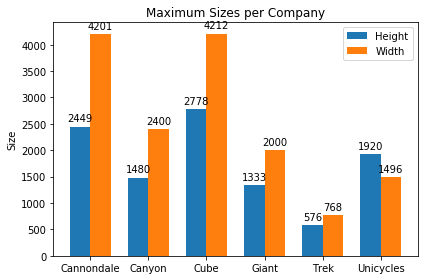

In [29]:
labels = ['Cannondale', 'Canyon', 'Cube', 'Giant', 'Trek', 'Unicycles']

print(cannondale_sizes['max_height'])

max_heights = [cannondale_sizes['max_height'], canyon_sizes['max_height'], 
               cube_sizes['max_height'], giant_sizes['max_height'],
               trek_sizes['max_height'], unicycle_sizes['max_height']
              ]
max_widths = [cannondale_sizes['max_width'], canyon_sizes['max_width'], 
               cube_sizes['max_width'], giant_sizes['max_width'],
               trek_sizes['max_width'], unicycle_sizes['max_width']
              ]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, max_heights, width, label='Height')
rects2 = ax.bar(x + width/2, max_widths, width, label='Width')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Size')
ax.set_title('Maximum Sizes per Company')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

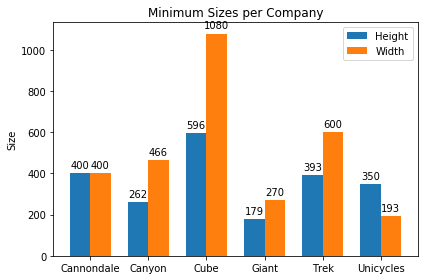

In [30]:
labels = ['Cannondale', 'Canyon', 'Cube', 'Giant', 'Trek', 'Unicycles']


min_heights = [cannondale_sizes['min_height'], canyon_sizes['min_height'], 
               cube_sizes['min_height'], giant_sizes['min_height'],
               trek_sizes['min_height'], unicycle_sizes['min_height']
              ]
min_widths = [cannondale_sizes['min_width'], canyon_sizes['min_width'], 
               cube_sizes['min_width'], giant_sizes['min_width'],
               trek_sizes['min_width'], unicycle_sizes['min_width']
              ]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, min_heights, width, label='Height')
rects2 = ax.bar(x + width/2, min_widths, width, label='Width')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Size')
ax.set_title('Minimum Sizes per Company')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

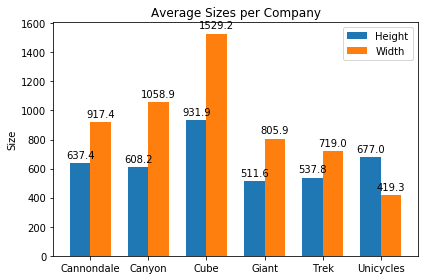

In [31]:
labels = ['Cannondale', 'Canyon', 'Cube', 'Giant', 'Trek', 'Unicycles']

avg_heights = [round(cannondale_sizes['avg_height'],1), round(canyon_sizes['avg_height'],1), 
               round(cube_sizes['avg_height'],1), round(giant_sizes['avg_height'],1),
               round(trek_sizes['avg_height'],1), round(unicycle_sizes['avg_height'],1)
              ]
avg_widths = [round(cannondale_sizes['avg_width'],1), round(canyon_sizes['avg_width'],1), 
               round(cube_sizes['avg_width'],1), round(giant_sizes['avg_width'],1),
               round(trek_sizes['avg_width'],1), round(unicycle_sizes['avg_width'],1)
              ]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, avg_heights, width, label='Height')
rects2 = ax.bar(x + width/2, avg_widths, width, label='Width')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Size')
ax.set_title('Average Sizes per Company')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [32]:
format_counter = collections.Counter(formats)

In [33]:
print(format_counter)

Counter({'JPEG': 394, 'PNG': 1})


In [55]:
color_space_counter = collections.Counter(color_spaces)
print(color_space_counter)

Counter({'': 214, b'\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01\x84\x00\x00\x00lwtpt\x00\x00\x01\xf0\x00\x00\x00\x14bkpt\x00\x00\x02\x04\x00\x00\x00\x14rXYZ\x00\x00\x02\x18\x00\x00\x00\x14gXYZ\x00\x00\x02,\x00\x00\x00\x14bXYZ\x00\x00\x02@\x00\x00\x00\x14dmnd\x00\x00\x02T\x00\x00\x00pdmdd\x00\x00\x02\xc4\x00\x00\x00\x88vued\x00\x00\x03L\x00\x00\x00\x86view\x00\x00\x03\xd4\x00\x00\x00$lumi\x00\x00\x03\xf8\x00\x00\x00\x14meas\x00\x00\x04\x0c\x00\x00\x00$tech\x00\x00\x040\x00\x00\x00\x0crTRC\x00\x00\x04<\x00\x00\x08\x0cgTRC\x00\x00\x04<\x00\x00\x08\x0cbTRC\x00\x00\x04<\x00\x00\x08\x0ct

In [ ]:
def get_color_spaces(array):
    spaces = []
    for i in range(len(array)):
        if image.shape == 3:
        spaces.append("rgb")
    elif image.shape == 4:
        spaces.append("cmyk")
    